# 1) IMPORT & INSTALL PACKAGES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as pylab 
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats 
from sklearn import metrics as mt

%matplotlib inline
pylab.rcParams['figure.figsize'] = 6,4

# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

# 2) DATA UNDERSTANDING

## 2.1) Load Data

In [29]:
# Import from

path = "input/"
df_train = pd.read_csv(path+"churn_data_train.csv",encoding='latin-1')
df_test = pd.read_csv(path+"churn_data_test.csv",encoding='latin-1')

## 2.2) Data Exploration

In [30]:
df_train.shape, df_test.shape

((4577, 21), (2466, 20))

In [31]:
df_train.head()

,ID,Sexo,AdultoMayor,Socio,Dependientes,MesesCliente,ServicioTelefonico,LineasMultiples,ServicioInternet,SeguridadOnline,...,ProteccionDispositivo,SoporteTecnico,TransmisionTV,TransmisionPeliculas,TerminoContrato,FacturacionElectronica,MetodoPago,MontoCargadoMes,MontoCargadoTotal,Churn
0,ID01802,Masculino,1.0,No,No,11.0,Si,Si,DSL,Si,...,No,No,No,No,Mes a mes,No,Tarjeta de credito (automatico),60.25,662.95,0
1,ID05696,Masculino,0.0,No,No,1.0,Si,No,No,Sin servicio de internet,...,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Mes a mes,No,Checke electronico,20.05,20.05,0
2,ID03166,Femenino,0.0,Si,Si,8.0,Si,No,Fibra Optica,No,...,Si,No,Si,Si,Mes a mes,Si,Checke por correo,94.20,777.3,1
3,ID00104,Masculino,0.0,Si,Si,50.0,No,Sin servicio telefonico,DSL,Si,...,No,No,Si,No,Mes a mes,Si,Transferencia bancaria (automatico),39.45,2021.35,0
4,ID05060,Femenino,0.0,No,No,71.0,Si,Si,Fibra Optica,Si,...,Si,Si,Si,Si,Bianual,Si,Checke por correo,118.65,NaN,0


In [32]:
df_test.head()

,ID,Sexo,AdultoMayor,Socio,Dependientes,MesesCliente,ServicioTelefonico,LineasMultiples,ServicioInternet,SeguridadOnline,RespaldoOnline,ProteccionDispositivo,SoporteTecnico,TransmisionTV,TransmisionPeliculas,TerminoContrato,FacturacionElectronica,MetodoPago,MontoCargadoMes,MontoCargadoTotal
0,ID03436,Masculino,0.0,No,No,1.0,Si,No,DSL,Si,No,No,No,No,No,Mes a mes,No,Checke por correo,47.95,47.95
1,ID05166,Femenino,0.0,Si,Si,62.0,Si,Si,Fibra Optica,No,Si,Si,Si,Si,Si,Anual,Si,Checke por correo,110.80,6840.95
2,ID04004,Femenino,0.0,Si,No,7.0,Si,No,Fibra Optica,No,No,Si,No,Si,No,Mes a mes,Si,Checke por correo,86.25,587.1
3,ID05309,Femenino,1.0,Si,No,50.0,Si,Si,No,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Anual,No,Checke por correo,25.20,1306.3
4,ID05434,Masculino,0.0,Si,Si,1.0,Si,No,No,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Mes a mes,No,Checke electronico,NaN,19.2


In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4577 entries, 0 to 4576
Data columns (total 21 columns):
ID                        4577 non-null object
Sexo                      4577 non-null object
AdultoMayor               4503 non-null float64
Socio                     4548 non-null object
Dependientes              4577 non-null object
MesesCliente              4573 non-null float64
ServicioTelefonico        4577 non-null object
LineasMultiples           4577 non-null object
ServicioInternet          4577 non-null object
SeguridadOnline           4483 non-null object
RespaldoOnline            4483 non-null object
ProteccionDispositivo     4483 non-null object
SoporteTecnico            4483 non-null object
TransmisionTV             4483 non-null object
TransmisionPeliculas      4483 non-null object
TerminoContrato           4577 non-null object
FacturacionElectronica    4531 non-null object
MetodoPago                4577 non-null object
MontoCargadoMes           4163 non-null float

In [34]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 20 columns):
ID                        2466 non-null object
Sexo                      2466 non-null object
AdultoMayor               2414 non-null float64
Socio                     2447 non-null object
Dependientes              2466 non-null object
MesesCliente              2459 non-null float64
ServicioTelefonico        2466 non-null object
LineasMultiples           2466 non-null object
ServicioInternet          2466 non-null object
SeguridadOnline           2404 non-null object
RespaldoOnline            2404 non-null object
ProteccionDispositivo     2404 non-null object
SoporteTecnico            2404 non-null object
TransmisionTV             2404 non-null object
TransmisionPeliculas      2404 non-null object
TerminoContrato           2466 non-null object
FacturacionElectronica    2442 non-null object
MetodoPago                2466 non-null object
MontoCargadoMes           2267 non-null float

In [35]:
# Defining features types
ID = 'ID'
TARGET = 'Churn'

In [36]:
# Distribución del Target
df_train[TARGET].value_counts(dropna=False)

0    3362
1    1215
Name: Churn, dtype: int64

In [37]:
df_train[TARGET].value_counts(dropna=False, normalize = True)*100

0    73.454228
1    26.545772
Name: Churn, dtype: float64

In [38]:
df_train.sort_values("ID").head(50)

,ID,Sexo,AdultoMayor,Socio,Dependientes,MesesCliente,ServicioTelefonico,LineasMultiples,ServicioInternet,SeguridadOnline,...,ProteccionDispositivo,SoporteTecnico,TransmisionTV,TransmisionPeliculas,TerminoContrato,FacturacionElectronica,MetodoPago,MontoCargadoMes,MontoCargadoTotal,Churn
940,ID00001,Femenino,0.0,Si,Si,1.0,Si,No,No,Sin servicio de internet,...,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Mes a mes,NaN,Transferencia bancaria (automatico),20.15,20.15,1
1848,ID00004,Masculino,0.0,Si,Si,1.0,Si,No,Fibra Optica,No,...,No,No,No,No,Mes a mes,No,Transferencia bancaria (automatico),74.60,74.6,0
1378,ID00005,Femenino,0.0,No,Si,2.0,Si,No,DSL,Si,...,No,No,No,Si,Mes a mes,Si,Transferencia bancaria (automatico),61.20,125.95,0
4051,ID00006,Femenino,0.0,No,Si,2.0,Si,Si,Fibra Optica,Si,...,No,No,No,No,Mes a mes,No,Transferencia bancaria (automatico),80.55,188.1,0
3259,ID00007,Masculino,0.0,Si,Si,2.0,Si,No,Fibra Optica,No,...,Si,Si,No,Si,Mes a mes,No,Transferencia bancaria (automatico),90.00,190.05,1
3389,ID00008,Femenino,0.0,Si,Si,3.0,No,Sin servicio telefonico,DSL,Si,...,No,No,No,No,Mes a mes,No,Transferencia bancaria (automatico),29.70,91.7,1
761,ID00009,Masculino,0.0,No,Si,3.0,Si,No,DSL,No,...,No,No,Si,No,Mes a mes,Si,Transferencia bancaria (automatico),54.70,169.45,1
4040,ID00011,Femenino,0.0,No,Si,4.0,Si,No,No,Sin servicio de internet,...,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Mes a mes,No,Transferencia bancaria (automatico),20.40,94.5,0
2394,ID00012,Masculino,0.0,Si,Si,4.0,No,Sin servicio telefonico,DSL,Si,...,No,No,Si,No,Mes a mes,No,Transferencia bancaria (automatico),38.55,156.1,0
1182,ID00013,Masculino,0.0,Si,Si,4.0,Si,No,DSL,No,...,No,Si,No,Si,Mes a mes,No,Transferencia bancaria (automatico),61.45,229.55,1


In [39]:
df_train['AdultoMayor'] = df_train['AdultoMayor'].astype(str) # Convertir a variable categorica
df_test['AdultoMayor'] = df_test['AdultoMayor'].astype(str) # Convertir a variable categorica

In [40]:
# Arreglando valores " " en esta columna
df_train.MontoCargadoTotal= df_train.MontoCargadoTotal.replace(" ",np.nan)
df_train.MontoCargadoTotal = df_train.MontoCargadoTotal.astype(float)

df_test.MontoCargadoTotal= df_test.MontoCargadoTotal.replace(" ",np.nan)
df_test.MontoCargadoTotal = df_test.MontoCargadoTotal.astype(float)

In [41]:
df_train.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,4577,4577,ID01050,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sexo,4577,2,Masculino,2323,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AdultoMayor,4577,3,0.0,3808,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Socio,4548,2,No,2368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependientes,4577,2,No,3216,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MesesCliente,4573,NaN,NaN,NaN,32.4083,24.6555,1,9,29,56,72
ServicioTelefonico,4577,2,Si,4118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LineasMultiples,4577,3,No,2205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ServicioInternet,4577,3,Fibra Optica,1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeguridadOnline,4483,3,No,2261,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df_test.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,2466,2466,ID02624,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sexo,2466,2,Femenino,1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AdultoMayor,2466,3,0.0,2028,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Socio,2447,2,No,1225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependientes,2466,2,No,1717,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MesesCliente,2459,NaN,NaN,NaN,32.4469,24.344,1,9,29,55,72
ServicioTelefonico,2466,2,Si,2243,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LineasMultiples,2466,3,No,1185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ServicioInternet,2466,3,Fibra Optica,1108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeguridadOnline,2404,3,No,1237,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
for col in df_train.drop("ID",axis=1).select_dtypes(include=['object']):
    print(pd.crosstab(df_train[col],df_train.AdultoMayor))

AdultoMayor   0.0  1.0  nan
Sexo                       
Femenino     1877  339   38
Masculino    1931  356   36
AdultoMayor   0.0  1.0  nan
AdultoMayor                
0.0          3808    0    0
1.0             0  695    0
nan             0    0   74
AdultoMayor   0.0  1.0  nan
Socio                      
No           1992  336   40
Si           1792  355   33
AdultoMayor    0.0  1.0  nan
Dependientes                
No            2521  633   62
Si            1287   62   12
AdultoMayor          0.0  1.0  nan
ServicioTelefonico                
No                   380   76    3
Si                  3428  619   71
AdultoMayor               0.0  1.0  nan
LineasMultiples                        
No                       1957  213   35
Si                       1471  406   36
Sin servicio telefonico   380   76    3
AdultoMayor        0.0  1.0  nan
ServicioInternet                
DSL               1398  160   21
Fibra Optica      1437  508   43
No                 973   27   10
AdultoMayor    

In [44]:
# Es seguro asumir que AdultoMayor deberia ser imputado por Moda = 0

In [45]:
for col in df_train.drop("ID",axis=1).select_dtypes(include=['object']):
    print(pd.crosstab(df_train[col],df_train.Socio))

Socio        No    Si
Sexo                 
Femenino   1153  1091
Masculino  1215  1089
Socio          No    Si
AdultoMayor            
0.0          1992  1792
1.0           336   355
nan            40    33
Socio    No    Si
Socio            
No     2368     0
Si        0  2180
Socio           No    Si
Dependientes            
No            2128  1061
Si             240  1119
Socio                 No    Si
ServicioTelefonico            
No                   253   204
Si                  2115  1976
Socio                      No    Si
LineasMultiples                    
No                       1290   897
Si                        825  1079
Sin servicio telefonico   253   204
Socio               No   Si
ServicioInternet           
DSL                834  739
Fibra Optica      1018  955
No                 516  486
Socio                       No   Si
SeguridadOnline                    
No                        1312  932
Si                         540  762
Sin servicio de internet   469  

In [46]:
# Hay una relacion con Dependiente. Si Dependientes es NO, hay mas chance de que sea NO socio. 
# Si dependientes es SI, hay mucha mas chance de que SI sea socio
# Imputar por Dependiente

In [47]:
for col in df_train.drop("ID",axis=1).select_dtypes(include=['object']):
    print(pd.crosstab(df_train[col],df_train.FacturacionElectronica))

FacturacionElectronica   No    Si
Sexo                             
Femenino                901  1332
Masculino               916  1382
FacturacionElectronica    No    Si
AdultoMayor                       
0.0                     1638  2127
1.0                      154   539
nan                       25    48
FacturacionElectronica   No    Si
Socio                            
No                      916  1428
Si                      881  1278
FacturacionElectronica    No    Si
Dependientes                      
No                      1169  2017
Si                       648   697
FacturacionElectronica    No    Si
ServicioTelefonico                
No                       201   258
Si                      1616  2456
FacturacionElectronica     No    Si
LineasMultiples                    
No                       1058  1124
Si                        558  1332
Sin servicio telefonico   201   258
FacturacionElectronica   No    Si
ServicioInternet                 
DSL                     7

In [48]:
# Cuando no hay servicio de Internet es mejor ponerle NO. Cuando si hay, mejor ponerle si

In [49]:
for col in df_train.drop("ID",axis=1).select_dtypes(include=['object']):
    print(pd.crosstab(df_train[col],df_train.SeguridadOnline))

SeguridadOnline    No   Si  Sin servicio de internet
Sexo                                                
Femenino         1102  675                       435
Masculino        1159  631                       481
SeguridadOnline    No    Si  Sin servicio de internet
AdultoMayor                                          
0.0              1729  1106                       883
1.0               489   179                        23
nan                43    21                        10
SeguridadOnline    No   Si  Sin servicio de internet
Socio                                               
No               1312  540                       469
Si                932  762                       441
SeguridadOnline    No   Si  Sin servicio de internet
Dependientes                                        
No               1787  848                       526
Si                474  458                       390
SeguridadOnline       No    Si  Sin servicio de internet
ServicioTelefonico                   

In [50]:
#No hay un patron claro asi que imputar por Moda = NO

In [51]:
df_train['AdultoMayor'] = df_train['AdultoMayor'].astype(float) # Convertir a variable numerica
df_test['AdultoMayor'] = df_test['AdultoMayor'].astype(float) 

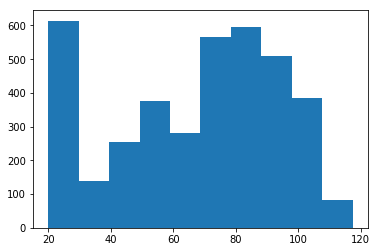

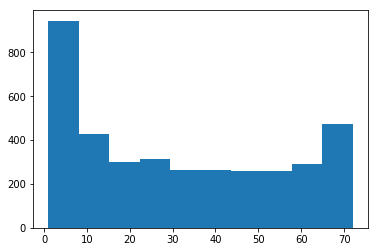

In [52]:
import matplotlib.pyplot as plt



plt.hist("MontoCargadoMes", data = df_train.dropna())
plt.show()

plt.hist("MesesCliente", data = df_train.dropna())
plt.show()



## 2.3) Evaluate missings

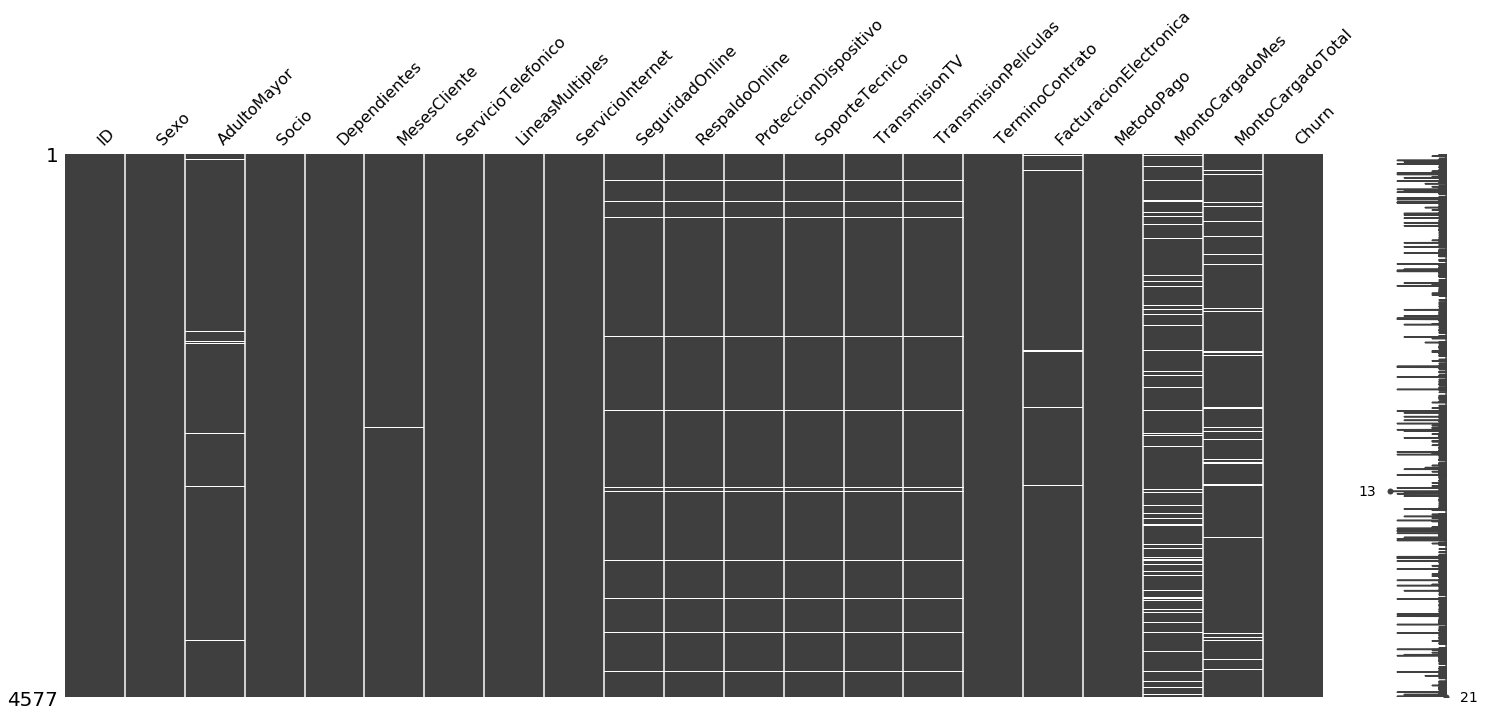

In [53]:
import missingno as msno

msno.matrix(df_train)

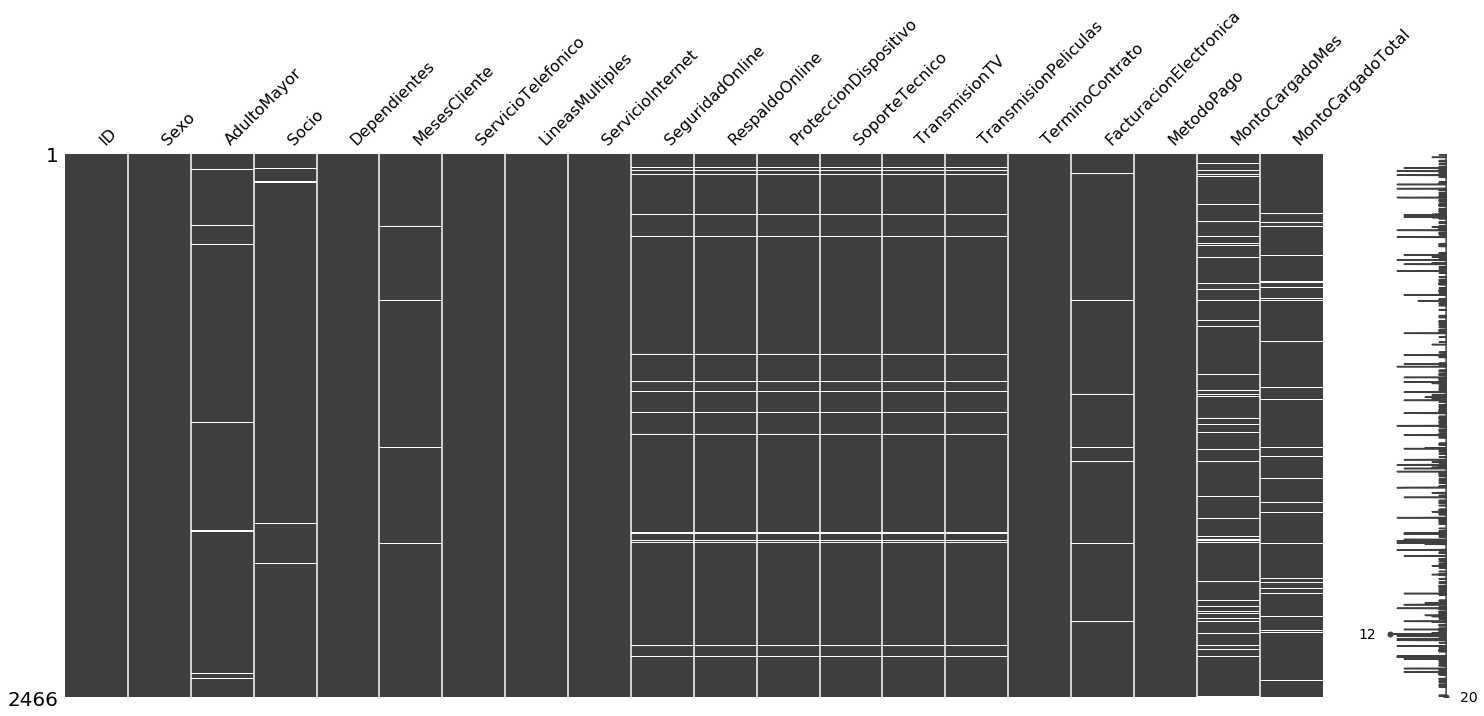

In [54]:
msno.matrix(df_test)

In [55]:
# No hay outliers

# 3) DATA PREPARATION

In [96]:
# Copy dataset and then apply transformation to copied dataset
ds_train = df_train.copy()

ds_test = df_test.copy()

In [97]:
ds_train.sort_values("ID",inplace=True)
ds_test.sort_values("ID",inplace=True)

## 3.1) Impute missings

In [98]:
ds_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4577 entries, 940 to 4291
Data columns (total 21 columns):
ID                        4577 non-null object
Sexo                      4577 non-null object
AdultoMayor               4503 non-null float64
Socio                     4548 non-null object
Dependientes              4577 non-null object
MesesCliente              4573 non-null float64
ServicioTelefonico        4577 non-null object
LineasMultiples           4577 non-null object
ServicioInternet          4577 non-null object
SeguridadOnline           4483 non-null object
RespaldoOnline            4483 non-null object
ProteccionDispositivo     4483 non-null object
SoporteTecnico            4483 non-null object
TransmisionTV             4483 non-null object
TransmisionPeliculas      4483 non-null object
TerminoContrato           4577 non-null object
FacturacionElectronica    4531 non-null object
MetodoPago                4577 non-null object
MontoCargadoMes           4163 non-null flo

In [99]:
# AdultoMayor (imputacion por MODA)
ds_train["AdultoMayor"].fillna(0, inplace = True)
ds_test["AdultoMayor"].fillna(0, inplace = True)

#Socio (imputacion por Dependientes)
#ds_train["Socio"].fillna("No",inplace = True)
#ds_test["Socio"].fillna("No",inplace = True)

def imputarSocio(row):
    
    if pd.isnull(row.Socio):
        if row.Dependientes == "Si":
            return "Si"
        else:
            return "No"
    else:
        return row.Socio

ds_train["Socio"] = ds_train.apply(imputarSocio, axis=1)
ds_test["Socio"] = ds_test.apply(imputarSocio, axis=1)

# MesesCliente (imputacion por ffill ya que al ordenar por ID si cuadra que esta ordenado por MesesCliente)
ds_train["MesesCliente"].fillna(method='ffill', inplace = True)
ds_test["MesesCliente"].fillna(method='ffill', inplace = True)

#SeguridadOnline (imputacion por MODA)
ds_train["SeguridadOnline"].fillna("No", inplace = True)
ds_test["SeguridadOnline"].fillna("No", inplace = True)

#RespaldoOnline (imputacion por MODA)
ds_train["RespaldoOnline"].fillna("No", inplace = True)
ds_test["RespaldoOnline"].fillna("No", inplace = True)

# ProteccionDispositivo (imputacion por MODA)
ds_train["ProteccionDispositivo"].fillna('No', inplace = True)
ds_test["ProteccionDispositivo"].fillna('No', inplace = True)

# SoporteTecnico (imputacion por MODA)
ds_train["SoporteTecnico"].fillna('No', inplace = True)
ds_test["SoporteTecnico"].fillna('No', inplace = True)

# TransmisionTV (imputacion por MODA)
ds_train["TransmisionTV"].fillna('No', inplace = True)
ds_test["TransmisionTV"].fillna('No', inplace = True)

# TransmisionPeliculas (imputacion por MODA)
ds_train["TransmisionPeliculas"].fillna('No', inplace = True)
ds_test["TransmisionPeliculas"].fillna('No', inplace = True)

# TerminoContrato (imputacion por MODA)
ds_train["TerminoContrato"].fillna('Mes a mes', inplace = True)
ds_test["TerminoContrato"].fillna('Mes a mes', inplace = True)

# FacturacionElectronica (imputacion en base a ServicioInternet)
#ds_train["FacturacionElectronica"].fillna('Si', inplace = True)
#ds_test["FacturacionElectronica"].fillna('Si', inplace = True)

def imputarFact(row):
    
    if pd.isnull(row.FacturacionElectronica):
        if row.ServicioInternet == "No":
            return "No"
        else:
            return "Si"
    else:
        return row.FacturacionElectronica

ds_train["FacturacionElectronica"] = ds_train.apply(imputarFact, axis=1)
ds_test["FacturacionElectronica"] = ds_test.apply(imputarFact, axis=1)




# MetodoPago (imputacion por MODA)
ds_train["MetodoPago"].fillna('Checke por correo', inplace = True)
ds_test["MetodoPago"].fillna('Checke por correo', inplace = True)

# MontoCargadoMes (imputacion por MEDIA)
#ds_train["MontoCargadoMes"].fillna(68.7, inplace = True)
#ds_test["MontoCargadoMes"].fillna(69.7, inplace = True)

# MontoCargadoTotal (imputacion por MEDIA)
#ds_train["MontoCargadoTotal"].fillna(1987.4, inplace = True)
#ds_test["MontoCargadoTotal"].fillna(2045.97, inplace = True)


In [100]:
# Arreglando MontoCargadoMes y MontoCargadoTotal
# La logica es que MontoCargaMes es la tarifa mensual fija y MontoCargaTotal es la tarifa mensual x el numero de meses.
# Entonces se reemplazaran los missings con este ajuste

def NuevoMontoCargadoMes(row):
    
    if np.isnan(row.MontoCargadoMes):
        if np.isnan(row.MontoCargadoTotal):
            return np.nan
        else:
            return row.MontoCargadoTotal / row.MesesCliente
    else: 
        return row.MontoCargadoMes

def NuevoMontoCargadoTotal(row):
    
    if np.isnan(row.MontoCargadoTotal):
        if np.isnan(row.MontoCargadoMes):
            return np.nan
        else:
            return row.MontoCargadoMes * row.MesesCliente
    else: 
        return row.MontoCargadoTotal


In [101]:
# Para la data test hay el caso donde montoCargadoMes y MontoCargadoTotal son missing
# montocargadomes se pondra como media y el total se multplicara de mesescliente

# MontoCargadoMes (imputacion por MEDIA)
#ds_train["MontoCargadoMes"].fillna(68.7, inplace = True)
#ds_test["MontoCargadoMes"].fillna(69.7, inplace = True)

# MontoCargadoTotal (imputacion por MEDIA)
#ds_train["MontoCargadoTotal"].fillna(1987.4, inplace = True)
#ds_test["MontoCargadoTotal"].fillna(2045.97, inplace = True)

In [102]:
ds_train["MontoCargadoMes"] = ds_train.apply(NuevoMontoCargadoMes, axis= 1)
ds_train["MontoCargadoTotal"] = ds_train.apply(NuevoMontoCargadoTotal, axis= 1)

ds_test["MontoCargadoMes"] = ds_test.apply(NuevoMontoCargadoMes, axis= 1)
ds_test["MontoCargadoTotal"] = ds_test.apply(NuevoMontoCargadoTotal, axis= 1)

In [103]:
#Puede haber casos en que queden en 0 ambos valores

ds_train.loc[ds_train["MontoCargadoMes"].isnull(), "MontoCargadoMes"] = ds_train.MontoCargadoMes.mean()
ds_test.loc[ds_test["MontoCargadoMes"].isnull(), "MontoCargadoMes"] = ds_test.MontoCargadoMes.mean()

ds_train.loc[ds_train["MontoCargadoTotal"].isnull(), "MontoCargadoTotal"] =  ds_train.MontoCargadoMes * ds_train.MesesCliente
ds_test.loc[ds_test["MontoCargadoTotal"].isnull(), "MontoCargadoTotal"] =  ds_test.MontoCargadoMes * ds_test.MesesCliente

In [104]:
ds_test[ds_test.MontoCargadoMes.isnull() & ds_test.MontoCargadoTotal.isnull()]

,ID,Sexo,AdultoMayor,Socio,Dependientes,MesesCliente,ServicioTelefonico,LineasMultiples,ServicioInternet,SeguridadOnline,RespaldoOnline,ProteccionDispositivo,SoporteTecnico,TransmisionTV,TransmisionPeliculas,TerminoContrato,FacturacionElectronica,MetodoPago,MontoCargadoMes,MontoCargadoTotal


## 3.2) Data Transformation

In [105]:
# ServicioTelefonico 
dicc_serv_telef = {'Si': 1, 'No':0 }
ds_train["ServicioTelefonico"] = ds_train["ServicioTelefonico"].map(dicc_serv_telef)
ds_test["ServicioTelefonico"] = ds_test["ServicioTelefonico"].map(dicc_serv_telef)

# Socio
dicc = {'Si': 1, 'No':0 }
ds_train["Socio"] = ds_train["Socio"].map(dicc)
ds_test["Socio"] = ds_test["Socio"].map(dicc)

# Dependientes
dicc = {'Si': 1, 'No':0 }
ds_train["Dependientes"] = ds_train["Dependientes"].map(dicc)
ds_test["Dependientes"] = ds_test["Dependientes"].map(dicc)

# Sexo
dicc = {'Masculino': 1, 'Femenino':0 }
ds_train["Sexo"] = ds_train["Sexo"].map(dicc)
ds_test["Sexo"] = ds_test["Sexo"].map(dicc)


# ServicioInternet 
dicc = {'Fibra Optica': 1, 'DSL':2, 'No':0 }
ds_train["ServicioInternet"] = ds_train["ServicioInternet"].map(dicc)
ds_test["ServicioInternet"] = ds_test["ServicioInternet"].map(dicc)


# TerminoContrato
dicc = {'Mes a mes': 0, 'Anual':1, 'Bianual':2 }
ds_train["TerminoContrato"] = ds_train["TerminoContrato"].map(dicc)
ds_test["TerminoContrato"] = ds_test["TerminoContrato"].map(dicc)

# FacturacionElectronica 
dicc_fact_elect = {'Si': 1, 'No':0 }
ds_train["FacturacionElectronica"] = ds_train["FacturacionElectronica"].map(dicc_fact_elect)
ds_test["FacturacionElectronica"] = ds_test["FacturacionElectronica"].map(dicc_fact_elect)

# Lineas Multiples
dicc_fact_elect = {'Si': 2, 'No':1 , "Sin servicio telefonico": 0}
ds_train['LineasMultiples'] = ds_train['LineasMultiples'].map(dicc_fact_elect)
ds_test['LineasMultiples'] = ds_test['LineasMultiples'].map(dicc_fact_elect)

# MetodoPago
dicc_fact_elect = {'Checke por correo': 0, 'Checke electronico':1 , "Tarjeta de credito (automatico)": 2,"Transferencia bancaria (automatico)":3}
ds_train['MetodoPago'] = ds_train['MetodoPago'].map(dicc_fact_elect)
ds_test['MetodoPago'] = ds_test['MetodoPago'].map(dicc_fact_elect)


# Mapeo multiple
list_cols = ['SeguridadOnline', 'RespaldoOnline', 'TransmisionTV',
       'TransmisionPeliculas',  'ProteccionDispositivo', 'SoporteTecnico']

dicc = {'Si': 2, 'No':1, 'Sin servicio de internet':0 }

for col in list_cols:
    
    ds_train[col] = ds_train[col].map(dicc)
    ds_test[col] = ds_test[col].map(dicc)



In [106]:
ds_train['AdultoMayor'] = ds_train['AdultoMayor'].astype(int)
ds_test['AdultoMayor'] = ds_test['AdultoMayor'].astype(int)

## 3.3) Feature Engineering

In [107]:
# New Feature 1
tmp_byAdultoMayor_medianMontoMes = ds_train.groupby(['AdultoMayor'])['MontoCargadoMes'].median().round()
tmp_byAdultoMayor_medianMontoMes

AdultoMayor
0    66.0
1    85.0
Name: MontoCargadoMes, dtype: float64

In [108]:
ds_train['flg_bySexo_mayorMedianMontoMes'] = ds_train.apply(lambda x: 1 if x.MontoCargadoMes >= tmp_byAdultoMayor_medianMontoMes[x.AdultoMayor] else 0,
                                                       axis = 1)

ds_test['flg_bySexo_mayorMedianMontoMes'] = ds_test.apply(lambda x: 1 if x.MontoCargadoMes >= tmp_byAdultoMayor_medianMontoMes[x.AdultoMayor] else 0,
                                                       axis = 1)

In [109]:
# MontoCargoTotal a veces tiene valores por encima o por debajo que el MontoCargoMes x Numero Meses. Esto implica que parece haber
# un sobrecargo o descuento. Vamos a mapear eso en otra variable

In [110]:
ds_train["%Gap"] =  ds_train.MontoCargadoTotal / (ds_train.MontoCargadoMes * ds_train.MesesCliente) - 1
ds_test["%Gap"] =  ds_test.MontoCargadoTotal / (ds_test.MontoCargadoMes * ds_test.MesesCliente) - 1

In [111]:
# Meses restante que le queda del contrato
def MesesRestante(row):
    
    if row.TerminoContrato == 0:
        return 1
    elif row.TerminoContrato == 1:
        return 12 - row.MesesCliente % 12
    else:
        return 24 - row.MesesCliente % 24


In [112]:
ds_train["MesesRestantes"] = ds_train.apply(MesesRestante, axis= 1)
ds_test["MesesRestantes"] = ds_test.apply(MesesRestante, axis= 1)

In [113]:
def TipoCliente(row):
    seguro= False
    comodo = False
    
    
    if (row.SeguridadOnline == 1) & (row.RespaldoOnline == 1) & (row.SoporteTecnico == 1) & (row.ProteccionDispositivo == 1):
        seguro = True
        
    if (row.TransmisionTV == 1) & (row.TransmisionPeliculas == 1):
        comodo = True
        
    if seguro & comodo:
        return 0
    elif seguro:
        return 1
    elif comodo:
        return 2
    else:
        return 3
    


In [114]:
ds_train["TipoCliente"] = ds_train.apply(TipoCliente, axis= 1)
ds_test["TipoCliente"] = ds_test.apply(TipoCliente, axis=1)

In [115]:
ds_train.shape, ds_test.shape

((4577, 25), (2466, 24))

In [116]:
ds_train.info(), ds_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4577 entries, 940 to 4291
Data columns (total 25 columns):
ID                                4577 non-null object
Sexo                              4577 non-null int64
AdultoMayor                       4577 non-null int32
Socio                             4577 non-null int64
Dependientes                      4577 non-null int64
MesesCliente                      4577 non-null float64
ServicioTelefonico                4577 non-null int64
LineasMultiples                   4577 non-null int64
ServicioInternet                  4577 non-null int64
SeguridadOnline                   4577 non-null int64
RespaldoOnline                    4577 non-null int64
ProteccionDispositivo             4577 non-null int64
SoporteTecnico                    4577 non-null int64
TransmisionTV                     4577 non-null int64
TransmisionPeliculas              4577 non-null int64
TerminoContrato                   4577 non-null int64
FacturacionElectronica  

(None, None)

### Feature selection


In [117]:
ds_train.columns

Index(['ID', 'Sexo', 'AdultoMayor', 'Socio', 'Dependientes', 'MesesCliente',
       'ServicioTelefonico', 'LineasMultiples', 'ServicioInternet',
       'SeguridadOnline', 'RespaldoOnline', 'ProteccionDispositivo',
       'SoporteTecnico', 'TransmisionTV', 'TransmisionPeliculas',
       'TerminoContrato', 'FacturacionElectronica', 'MetodoPago',
       'MontoCargadoMes', 'MontoCargadoTotal', 'Churn',
       'flg_bySexo_mayorMedianMontoMes', '%Gap', 'MesesRestantes',
       'TipoCliente'],
      dtype='object')

In [118]:
features_to_model = list(ds_train.columns)

features_to_model.remove(TARGET) # Eliminar variable Target
features_to_model.remove(ID) # Eliminar variable ID

list(features_to_model)

['Sexo',
 'AdultoMayor',
 'Socio',
 'Dependientes',
 'MesesCliente',
 'ServicioTelefonico',
 'LineasMultiples',
 'ServicioInternet',
 'SeguridadOnline',
 'RespaldoOnline',
 'ProteccionDispositivo',
 'SoporteTecnico',
 'TransmisionTV',
 'TransmisionPeliculas',
 'TerminoContrato',
 'FacturacionElectronica',
 'MetodoPago',
 'MontoCargadoMes',
 'MontoCargadoTotal',
 'flg_bySexo_mayorMedianMontoMes',
 '%Gap',
 'MesesRestantes',
 'TipoCliente']

In [119]:
from sklearn.tree import DecisionTreeClassifier

In [120]:
X_train = ds_train[features_to_model]
y_train = ds_train[TARGET]

In [121]:
# Create  model objet 
model_tree = DecisionTreeClassifier(min_samples_leaf=20)

# Fit the model:
model_tree.fit(X_train, y_train)

model = model_tree

In [122]:
# Generar las predicciones:
y_pred_train = model.predict(X_train)

In [123]:
accuracy_train = mt.accuracy_score(y_train, y_pred_train)

print("Accuracy - Train: {}".format(accuracy_train))


Accuracy - Train: 0.8308935984269172


In [124]:
df_feature_importances = pd.DataFrame()
df_feature_importances['feature'] = X_train.columns
df_feature_importances['importance'] = (model.feature_importances_/model.feature_importances_.sum())*100
df_feature_importances = df_feature_importances.sort_values(by = ['importance','feature'],ascending=False)
df_feature_importances.reset_index(drop = True,inplace=True)

df_feature_importances

,feature,importance
0,TerminoContrato,38.103864
1,MontoCargadoMes,20.506038
2,MesesCliente,15.122513
3,MontoCargadoTotal,6.459866
4,%Gap,4.147341
5,ServicioInternet,2.995659
6,MetodoPago,2.512468
7,Sexo,1.919429
8,AdultoMayor,1.526971
9,TipoCliente,1.229651


In [125]:
#corr = ds_train.corr()

#corr.style.background_gradient(cmap='coolwarm').set_precision(2)

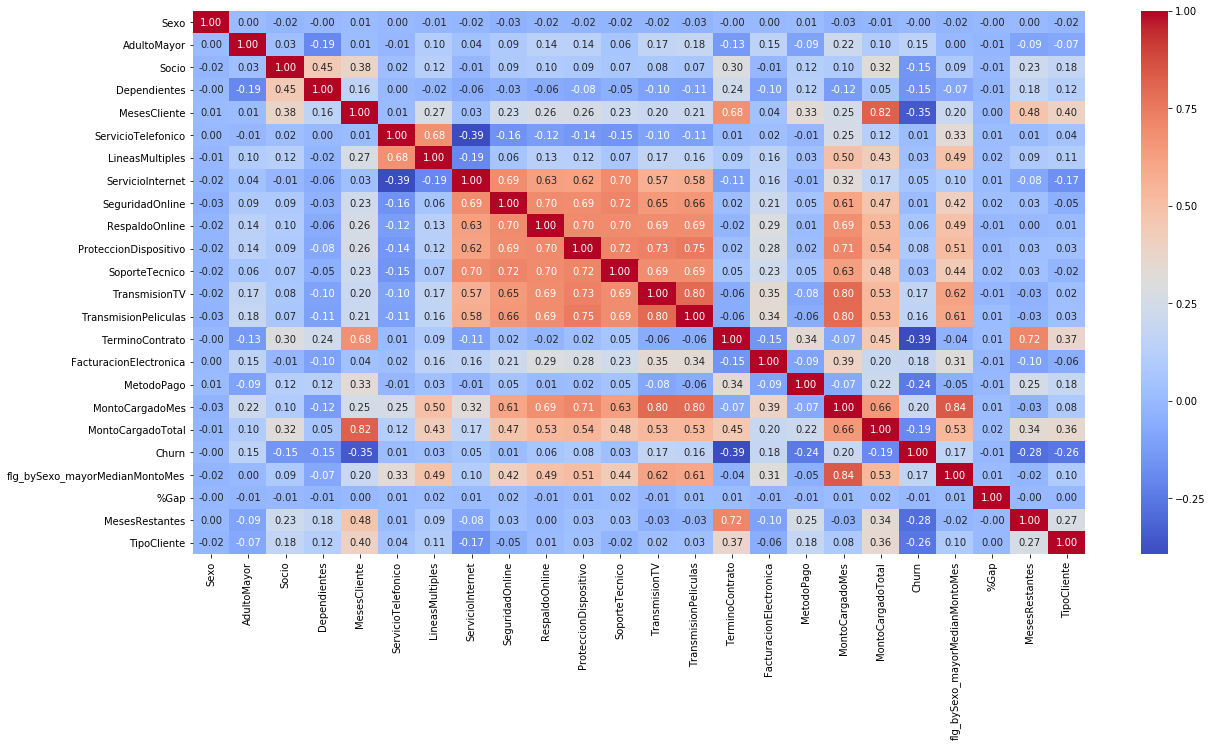

In [126]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(20, 10)) 
sns.heatmap(ds_train.corr(), ax= ax, annot= True,cmap='coolwarm', fmt= ".2f")

In [127]:
'''
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(X_train.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(X_train.columns)
ax.set_yticklabels(X_train.columns)
plt.show()

'''


'\nfig = plt.figure()\nax = fig.add_subplot(111)\ncax = ax.matshow(corr, vmin=-1, vmax=1)\nfig.colorbar(cax)\nticks = np.arange(0,len(X_train.columns),1)\nax.set_xticks(ticks)\nplt.xticks(rotation=90)\nax.set_yticks(ticks)\nax.set_xticklabels(X_train.columns)\nax.set_yticklabels(X_train.columns)\nplt.show()\n\n'

In [128]:
#Variables finales a usar (> 1% tanto en arbol de 20 y 10 minleaf)

features_to_model = ['Sexo',
 "Socio",
 "Dependientes",
 'AdultoMayor',
 'MesesCliente',
 'ServicioTelefonico',
 'LineasMultiples',
 'ServicioInternet',
 'TerminoContrato',
 'FacturacionElectronica',
 'MetodoPago',
 'MontoCargadoMes',
 'MontoCargadoTotal',
 'MesesRestantes',
 '%Gap',
 'TipoCliente']


'''features_to_model = ['Sexo',
 'AdultoMayor',
 'Socio',
 'Dependientes',
 'MesesCliente',
 'ServicioTelefonico',
 'LineasMultiples',
 'ServicioInternet',
 'SeguridadOnline',
 'RespaldoOnline',
 'ProteccionDispositivo',
 'SoporteTecnico',
 'TransmisionTV',
 'TransmisionPeliculas',
 'TerminoContrato',
 'FacturacionElectronica',
 'MetodoPago',
 'MontoCargadoMes',
 'MontoCargadoTotal',
 'flg_bySexo_mayorMedianMontoMes',
 '%Gap',
 'MesesRestantes',
 'TipoCliente']'''


"features_to_model = ['Sexo',\n 'AdultoMayor',\n 'Socio',\n 'Dependientes',\n 'MesesCliente',\n 'ServicioTelefonico',\n 'LineasMultiples',\n 'ServicioInternet',\n 'SeguridadOnline',\n 'RespaldoOnline',\n 'ProteccionDispositivo',\n 'SoporteTecnico',\n 'TransmisionTV',\n 'TransmisionPeliculas',\n 'TerminoContrato',\n 'FacturacionElectronica',\n 'MetodoPago',\n 'MontoCargadoMes',\n 'MontoCargadoTotal',\n 'flg_bySexo_mayorMedianMontoMes',\n '%Gap',\n 'MesesRestantes',\n 'TipoCliente']"

In [130]:
ds_train = ds_train[features_to_model+[TARGET]]
ds_test = ds_test[features_to_model]

In [131]:
ds_test.columns

Index(['Sexo', 'Socio', 'Dependientes', 'AdultoMayor', 'MesesCliente',
       'ServicioTelefonico', 'LineasMultiples', 'ServicioInternet',
       'TerminoContrato', 'FacturacionElectronica', 'MetodoPago',
       'MontoCargadoMes', 'MontoCargadoTotal', 'MesesRestantes', '%Gap',
       'TipoCliente'],
      dtype='object')

In [132]:
X = ds_train[features_to_model]
y = ds_train[TARGET]

X_summit = ds_test

print("train: ", X.shape,", summit: ", X_summit.shape)

train:  (4577, 16) , summit:  (2466, 16)


In [133]:
X_summit.describe().T

,count,mean,std,min,25%,50%,75%,max
Sexo,2466.0,0.499594,0.500101,0.000000,0.000000,0.000,1.000000,1.000000
Socio,2466.0,0.497567,0.500095,0.000000,0.000000,0.000,1.000000,1.000000
Dependientes,2466.0,0.303731,0.459961,0.000000,0.000000,0.000,1.000000,1.000000
AdultoMayor,2466.0,0.156529,0.363430,0.000000,0.000000,0.000,0.000000,1.000000
MesesCliente,2466.0,32.548256,24.383854,1.000000,9.000000,29.000,55.000000,72.000000
ServicioTelefonico,2466.0,0.909570,0.286855,0.000000,1.000000,1.000,1.000000,1.000000
LineasMultiples,2466.0,1.338605,0.636377,0.000000,1.000000,1.000,2.000000,2.000000
ServicioInternet,2466.0,1.132198,0.730363,0.000000,1.000000,1.000,2.000000,2.000000
TerminoContrato,2466.0,0.696675,0.834624,0.000000,0.000000,0.000,1.000000,2.000000
FacturacionElectronica,2466.0,0.581509,0.493412,0.000000,0.000000,1.000,1.000000,1.000000


In [134]:
X_summit

,Sexo,Socio,Dependientes,AdultoMayor,MesesCliente,ServicioTelefonico,LineasMultiples,ServicioInternet,TerminoContrato,FacturacionElectronica,MetodoPago,MontoCargadoMes,MontoCargadoTotal,MesesRestantes,%Gap,TipoCliente
1088,1,1,1,1,1.0,1,1,2,0,1,3,49.250000,49.25,1.0,0.000000,2
1705,1,1,1,0,1.0,1,1,1,0,1,3,69.950000,69.95,1.0,0.000000,0
815,0,1,1,0,3.0,1,1,2,0,1,3,58.700000,168.60,1.0,-0.042589,3
633,0,1,1,0,5.0,1,1,1,0,0,3,69.950000,320.40,1.0,-0.083917,0
725,1,1,1,0,7.0,1,1,2,0,1,3,71.350000,515.75,1.0,0.032636,3
1462,1,1,1,0,8.0,1,1,2,0,1,3,51.300000,411.60,1.0,0.002924,2
365,0,0,1,0,9.0,1,1,2,0,1,3,69.400000,571.45,1.0,-0.085094,3
2197,0,0,1,0,11.0,1,1,0,0,0,3,20.100000,221.35,1.0,0.001131,3
1153,1,0,1,0,12.0,1,1,0,0,0,3,21.050000,235.80,1.0,-0.066508,3
610,1,0,1,0,13.0,1,1,2,0,0,3,66.400000,831.75,1.0,-0.036434,1


# 4) Modeling & Evaluation - Simple

## 4.1) Train & Test Split

In [135]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size = 0.70, random_state=9)
print((len(X_train), len(y_train)), (len(X_test), len(y_test)))

(3203, 3203) (1374, 1374)


In [136]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3203 entries, 1826 to 1013
Data columns (total 16 columns):
Sexo                      3203 non-null int64
Socio                     3203 non-null int64
Dependientes              3203 non-null int64
AdultoMayor               3203 non-null int32
MesesCliente              3203 non-null float64
ServicioTelefonico        3203 non-null int64
LineasMultiples           3203 non-null int64
ServicioInternet          3203 non-null int64
TerminoContrato           3203 non-null int64
FacturacionElectronica    3203 non-null int64
MetodoPago                3203 non-null int64
MontoCargadoMes           3203 non-null float64
MontoCargadoTotal         3203 non-null float64
MesesRestantes            3203 non-null float64
%Gap                      3203 non-null float64
TipoCliente               3203 non-null int64
dtypes: float64(5), int32(1), int64(10)
memory usage: 412.9 KB


## 4.2.A. LogisticRegression

### 4.2.1 Training

In [137]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Create  model objet 
model_rlog = LogisticRegression(random_state=0, n_jobs = -1, penalty = 'l1')

parameters = {
    
    "C" : [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09],
    "max_iter" : [100,110,120,130,140,150],
    "solver": ["saga", "liblinear"]
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)


X_train_s = StandardScaler().fit_transform(X_train)

# Run the grid search
grid_obj = GridSearchCV(model_rlog, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train_s, y_train)

# Set the model to the best combination of parameters
model_rlog = grid_obj.best_estimator_

# Fit the model:
model_rlog.fit(X_train_s, y_train)


LogisticRegression(C=0.09, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l1', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [138]:
model = model_rlog 

In [139]:
df_weights = pd.DataFrame({'feature':X_train.columns.values, 'beta': np.round(model_rlog.coef_[0],4) })
df_weights.sort_values("beta")

,feature,beta
4,MesesCliente,-0.8386
8,TerminoContrato,-0.4161
5,ServicioTelefonico,-0.2200
15,TipoCliente,-0.2180
13,MesesRestantes,-0.1827
7,ServicioInternet,-0.1611
10,MetodoPago,-0.1609
0,Sexo,0.0000
1,Socio,0.0000
2,Dependientes,0.0000


### 4.2.2 Evaluación del Modelo

In [140]:
# Generar las predicciones:
y_pred_train = model.predict(X_train_s)

X_test_s = StandardScaler().fit_transform(X_test)
y_pred_test = model.predict(X_test_s)

# Generar las probabilidades
y_pred_proba_train = model.predict_proba(X_train_s)[:,1]
y_pred_proba_test = model.predict_proba(X_test_s)[:,1]

In [141]:
accuracy_train = mt.accuracy_score(y_train, y_pred_train)
accuracy_test = mt.accuracy_score(y_test, y_pred_test)

print("Accuracy - Train: {}".format(accuracy_train))
print("Accuracy - Test : {}".format(accuracy_test))

Accuracy - Train: 0.8017483609116454
Accuracy - Test : 0.7882096069868996


El punto de corte por defecto es de 0.50 para decidir si la predicción final será 1 ó 0. A continuación trataremos de encontrar ese punto de corte que optimice la métrica de evaluación del problema..

### ****Find best threshold:****

In [142]:
list_accuracy_test = []
for threshold in range(0,100):
  pred_0_1 = [1 if x >= threshold/100 else 0 for x in y_pred_proba_test]
  list_accuracy_test.append(mt.accuracy_score(y_test, pred_0_1))

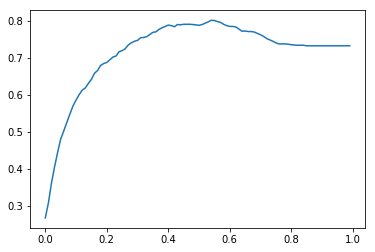

In [143]:
xs = [x/100 for x in range(0,100)]
ys = list_accuracy_test
plt.plot(xs, ys)

In [144]:
best_scoring = max(list_accuracy_test)
best_threshold = list_accuracy_test.index(best_scoring)/100
print("El mejor threshold es: {}".format(best_threshold))

El mejor threshold es: 0.54


In [145]:
accuracy_train = mt.accuracy_score(y_train, [1 if x >= best_threshold else 0 for x in y_pred_proba_train])
accuracy_test = mt.accuracy_score(y_test, [1 if x >= best_threshold else 0 for x in y_pred_proba_test])

print("Accuracy - Train: {}".format(accuracy_train))
print("Accuracy - Test : {}".format(accuracy_test))

Accuracy - Train: 0.8008117389946925
Accuracy - Test : 0.8020378457059679


## 4.2.B. Random Forest con GridSearchCV

In [150]:
from sklearn.ensemble import RandomForestClassifier


# Create  model objet 
model_rf = RandomForestClassifier(random_state = 0, n_jobs = -1)

parameters = {
    
    "n_estimators" : [120,125,130,135,140,145,150,155,160],
    "max_depth" : [4,5],
    "min_samples_leaf" : [10,15,20],
    "max_features" : [0.2,0.4,0.5]
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)


X_train_s = StandardScaler().fit_transform(X_train)


# Run the grid search
grid_obj = GridSearchCV(model_rf, parameters, scoring=acc_scorer, cv= 5)
grid_obj = grid_obj.fit(X_train_s, y_train)

# Set the clf to the best combination of parameters
model_rf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
model_rf.fit(X_train_s, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=0.5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### 4.2.2 Evaluación del Modelo

In [175]:
# Generar las predicciones:
y_pred_train = model_rf.predict(X_train_s)

X_test_s = StandardScaler().fit_transform(X_test)
y_pred_test = model_rf.predict(X_test_s)

# Generar las probabilidades
y_pred_proba_train = model_rf.predict_proba(X_train_s)[:,1]
y_pred_proba_test = model_rf.predict_proba(X_test_s)[:,1]

In [176]:
accuracy_train = mt.accuracy_score(y_train, y_pred_train)
accuracy_test = mt.accuracy_score(y_test, y_pred_test)

print("Accuracy - Train: {}".format(accuracy_train))
print("Accuracy - Test : {}".format(accuracy_test))

Accuracy - Train: 0.8092413362472682
Accuracy - Test : 0.7903930131004366


El punto de corte por defecto es de 0.50 para decidir si la predicción final será 1 ó 0. A continuación trataremos de encontrar ese punto de corte que optimice la métrica de evaluación del problema..

### ****Find best threshold:****

In [177]:
list_accuracy_test = []
for threshold in range(0,100):
  pred_0_1 = [1 if x >= threshold/100 else 0 for x in y_pred_proba_test]
  list_accuracy_test.append(mt.accuracy_score(y_test, pred_0_1))

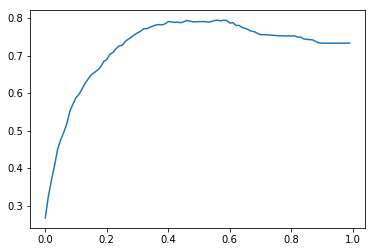

In [178]:
xs = [x/100 for x in range(0,100)]
ys = list_accuracy_test
plt.plot(xs, ys)

In [179]:
best_scoring = max(list_accuracy_test)
best_threshold = list_accuracy_test.index(best_scoring)/100
print("El mejor threshold es: {}".format(best_threshold))

El mejor threshold es: 0.56


In [180]:
accuracy_train = mt.accuracy_score(y_train, [1 if x >= best_threshold else 0 for x in y_pred_proba_train])
accuracy_test = mt.accuracy_score(y_test, [1 if x >= best_threshold else 0 for x in y_pred_proba_test])

print("Accuracy - Train: {}".format(accuracy_train))
print("Accuracy - Test : {}".format(accuracy_test))

Accuracy - Train: 0.8051826412738058
Accuracy - Test : 0.7940320232896652


### Feature Importances

In [181]:
df_feature_importances = pd.DataFrame()
df_feature_importances['feature'] = X_train.columns
df_feature_importances['importance'] = model_rf.feature_importances_/model_rf.feature_importances_.sum()
df_feature_importances = df_feature_importances.sort_values(by = ['importance','feature'],ascending=False)
df_feature_importances.reset_index(drop = True,inplace=True)

df_feature_importances

,feature,importance
0,TerminoContrato,0.271018
1,MontoCargadoMes,0.175207
2,MesesCliente,0.172892
3,MontoCargadoTotal,0.083881
4,MesesRestantes,0.083180
5,MetodoPago,0.069505
6,ServicioInternet,0.058655
7,TipoCliente,0.029106
8,%Gap,0.016029
9,FacturacionElectronica,0.013567


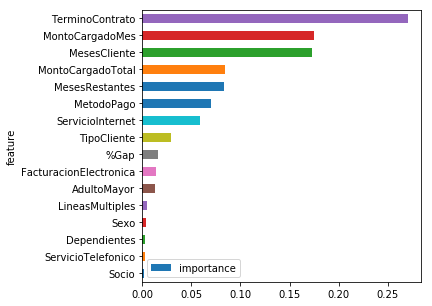

In [182]:
df_feature_importances[['feature','importance']].sort_values(by=['importance'],
                                                             ascending = [True]).plot(kind='barh',
                                                             x='feature',
                                                             y='importance',
                                                             legend=True, 
                                                             figsize=(5, 5))

## 4.2.C. Neural Network con GridSearchCV

In [183]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=0, max_iter = 500)

'''
parameters = {
    
    "alpha" : [0.0001,0.0005],
    "hidden_layer_sizes" : [(x,y) for x in range(50,111,10) for y in range(25,51,5)],
    "activation" : ["logistic","relu"],
    "learning_rate_init" : [0.001,0.0005,0.005]
}
'''
parameters = {
    
    "alpha" : [0.0001,0.0005],
    "hidden_layer_sizes" : [(50,25), (75,50),(100,50),(75,25),(100,25),(100,75)],
    "activation" : ["relu","logistic"],
    "learning_rate_init" : [0.001, 0.0005]
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)


X_train_s = StandardScaler().fit_transform(X_train)


# Run the grid search
grid_obj = GridSearchCV(mlp, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train_s, y_train)

# Set the clf to the best combination of parameters
model_nn = grid_obj.best_estimator_

model_nn.fit(X_train_s, y_train)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 25), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

### 4.2.2 Evaluación del Modelo

In [184]:
# Generar las predicciones:
y_pred_train = model_nn.predict(X_train_s)

X_test_s = StandardScaler().fit_transform(X_test)
y_pred_test = model_nn.predict(X_test_s)

# Generar las probabilidades
y_pred_proba_train = model_nn.predict_proba(X_train_s)[:,1]
y_pred_proba_test = model_nn.predict_proba(X_test_s)[:,1]

In [186]:
accuracy_train = mt.accuracy_score(y_train, y_pred_train)
accuracy_test = mt.accuracy_score(y_test, y_pred_test)

print("Accuracy - Train: {}".format(accuracy_train))
print("Accuracy - Test : {}".format(accuracy_test))

Accuracy - Train: 0.7998751170777396
Accuracy - Test : 0.7838427947598253


Como se puede notar, de los algoritmos entrenados, el modelo basado en LogReg con CV es el ganador con un accuracy optimizado por el punto de corte (threhold: 0.54)

### ****Find best threshold:****

In [187]:
list_accuracy_test = []
for threshold in range(0,100):
  pred_0_1 = [1 if x >= threshold/100 else 0 for x in y_pred_proba_test]
  list_accuracy_test.append(mt.accuracy_score(y_test, pred_0_1))

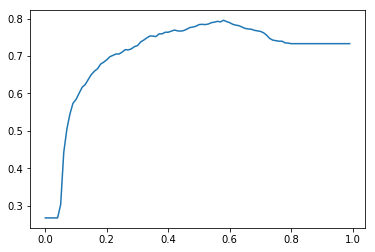

In [188]:
xs = [x/100 for x in range(0,100)]
ys = list_accuracy_test
plt.plot(xs, ys)

In [189]:
best_scoring = max(list_accuracy_test)
best_threshold = list_accuracy_test.index(best_scoring)/100
print("El mejor threshold es: {}".format(best_threshold))

El mejor threshold es: 0.58


In [190]:
accuracy_train = mt.accuracy_score(y_train, [1 if x >= best_threshold else 0 for x in y_pred_proba_train])
accuracy_test = mt.accuracy_score(y_test, [1 if x >= best_threshold else 0 for x in y_pred_proba_test])

print("Accuracy - Train: {}".format(accuracy_train))
print("Accuracy - Test : {}".format(accuracy_test))

Accuracy - Train: 0.7995629097720887
Accuracy - Test : 0.7954876273653566


# Predicciones on Submission DS

In [191]:
X_summit_s = StandardScaler().fit_transform(X_summit)

pred_prob_subm = model_nn.predict_proba(X_summit_s)[:,1]
pred_subm = [1 if x >= 0.58 else 0 for x in pred_prob_subm]

In [192]:
Y_summit_pred = pd.DataFrame()
Y_summit_pred[ID] = df_test[ID]

# Sort a los IDs para imputar los resultados
Y_summit_pred.sort_values("ID",inplace=True)

Y_summit_pred[TARGET] = pred_subm #pred_prob_subm
Y_summit_pred.head()

,ID,Churn
1088,ID00002,0
1705,ID00003,1
815,ID00010,0
633,ID00017,0
725,ID00023,0


To submission:

In [193]:
Y_summit_pred.to_csv("jdca_submission_26_nn_gsearch5.csv", index = False)

In [194]:
!kaggle competitions submit -c dsrp-kaggle-semillero-01 -f jdca_submission_26_nn_gsearch5.csv -m "Message"

Successfully submitted to DSRP - Kaggle Reuniones 1



  0%|          | 0.00/26.5k [00:00<?, ?B/s]
 30%|###       | 8.00k/26.5k [00:00<00:00, 24.2kB/s]
100%|##########| 26.5k/26.5k [00:00<00:00, 30.4kB/s]
